**<font color='black' size='12pt'>Der Eisverkäufer</font>**

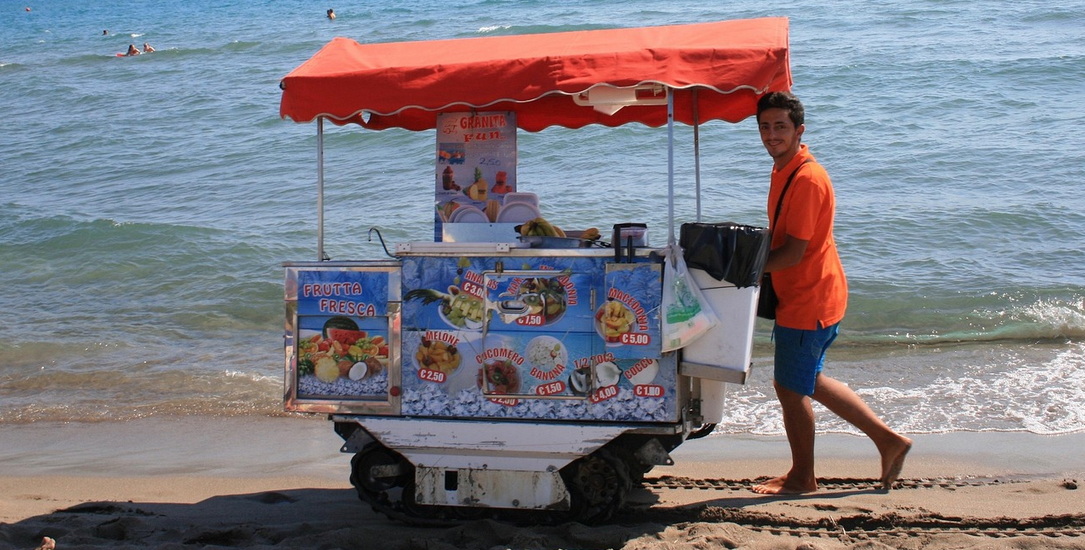
Bildquelle: fraban, 28. Juli 2016, https://pixabay.com/de/photos/eis-strand-eisverk%c3%a4ufer-maritim-1540685/, abgerufen am 25.11.2025

# Daten verstehen - Betrachtung eines Beispieldatensatzes

Ein Eisverkäufer möchte zu Beginn eines Tages wissen, wie viel Eis er heute von wlcher Sorte verkaufen wird, um die richtige Menge vorzubereiten und in seinen Wagen zu laden bzw. macht es nur an den Tagen Sinn an den Strand zu fahren, an denen er erwartungsgemäß mindestens 100 Eiskugeln verkauft. 

Ein KI-System soll anhand der Wetterdaten
* Sonnenstunden
* Mittlere Tagestemperatur
* Regenwahrscheinlichkeit
prognostizieren wie viele Eiskugeln an diesem Tag verkauft werden könnten.

Hierzu hat der Eisverkäufer die Werte für jeden Tag im Sommer 2025 aufgeschrieben.

An einem schönen Strandtag könnten die Werte beispielsweise folgendermaßen aussehen:

In [1]:
# Daten von einem Tag
sonne = 6  # in Stunden
temp  = 30 # in °C
regen = 20 # in Prozent
eis  = 350 # in Eiskugeln

# Beispieldatensatz mit einem einzelnen Künstlichen Neuron auswerten

In [2]:
import numpy         # Diese Bibliothek kann gut mit großen Datenmengen in Form von Matrizen umgehen 

input = numpy.array([sonne, temp, regen])
target = eis

In [3]:
print(f"Die einzelnen Merkmalswerte zu dem Tag sind in einer Liste gespeichert: {input}")         
print(f"Der Zielwert zu dem Tag ist eine einzelne Zahl, nämlich die Anzahl der verkauften Eiskugeln: {target}")   

Die einzelnen Merkmalswerte zu dem Tag sind in einer Liste gespeichert: [ 6 30 20]
Der Zielwert zu dem Tag ist eine einzelne Zahl, nämlich die Anzahl der verkauften Eiskugeln: 350


In [4]:
# Die Gewichte sind anfangs i.d.R. zufällig festgelegt 
# Hier sind es feste Zahlenwerte, um reproduzierbare Ergebnisse zu erzielen.
weights = numpy.array([0.3, 0.5, 0.6])

In [5]:
# Vorwärtsrechnung Perzeptron (Aktivierungsfunktion: lineare Funktion)
# Variante 1 - einzelne Rechnungen:
output = weights[0] * input[0]  +  weights[1] * input[1]  +  weights[2] * input[2]
print(output)

# Variante 2 - Matrizenmultiplikation:
output = sum(numpy.array([weights[0] * input[0],
                          weights[1] * input[1],
                          weights[2] * input[2]]))
print(output)

# Variante 3 - Matrizenmultiplikation mit der Bibliothek numpy:
output = numpy.dot(weights, input) 
print(output)

28.8
28.8
28.8


In [6]:
# Im Anschluss wird die Aktivierungsfunktion auf den Output berechnet
# Bei der ReLU ist es eine Fallunterscheidung: negative Werte werden auf Null gesetzt, positive Werte bleiben
if output < 0:
    output = 0

# Im Folgenden wird die Aktivierungsfunktion zur Vereinfachung weggelassen.

In [7]:
# Berechnung des Fehlers
error = target - output
print(f"Das KI-System hat {round(error)} Eiskugeln zu wenig prognostiziert!")
# Berechnung des quadratischen Fehlers (quadratisch --> stetiges Minimierungsproblem)
# Der Einfachheit halber ist die Fehlerfunktion hier nur für einen einzelnen Output definiert.
MSE = numpy.square(target - output)   
print(f"Die Fehlerfunktion MSE gibt mit {round(MSE)} einen sehr hohen einheitenlosen Wert aus.")

Das KI-System hat 321 Eiskugeln zu wenig prognostiziert!
Die Fehlerfunktion MSE gibt mit 103169 einen sehr hohen einheitenlosen Wert aus.


Durch die Ableitung der Fehlerfunktion (auch Kostenfunktion) wird die Richtung ermittelt, in der sich das vermutete Fehlerminimum befindet. Hierzu werden die partiellen Ableitungen zu den veränderbaren Gewichtswerten bestimmt. Diese sagen etwas darüber aus, wie diese Gewichtswerte verändert werden sollen, um zu einem besseren Ergebnis zu kommen!

In [8]:
# Berechnung der Ableitung nach dem Gewicht w0
dw0 = -2 * input[0] * error
print(f"Die Ableitung der Fehlerfunktion nach dem Gewicht w0 ergibt dMSE/dw0 = -2*i0*e = {round(dw0)}.")
# Berechnung der Ableitungen nach den Gewichten w0, w1, w2
dw = -2*input*error
print(f"Alle partiellen Ableitungen der Fehlerfunktion in einem Vektor: {numpy.round(dw)}.")


Die Ableitung der Fehlerfunktion nach dem Gewicht w0 ergibt dMSE/dw0 = -2*i0*e = -3854.
Alle partiellen Ableitungen der Fehlerfunktion in einem Vektor: [ -3854. -19272. -12848.].


In [9]:
# Um die Gewichtswerte anzupassen müssen wir sehr kleine Schritte gehen, sonst schießen wir über das Ziel hinaus!
# Die Lernrate alpha ist ein Hyperparameter, mit dem die Schrittweite angepasst werden kann.
alpha = 1e-5    # 1e-5 = 0.000001
weights = weights - alpha * dw
print(weights)

[0.338544 0.69272  0.72848 ]


In [10]:
# Vorher war der Fehler bei 321 Eiskugeln.
# Mal sehen wie groß der Fehler nun nach der Anpassung ist!
output = numpy.dot(weights, input) 
# Berechnung des Fehlers
error = target - output
print(f"Das KI-System hat {round(error)} Eiskugeln zu wenig prognostiziert!")


Das KI-System hat 313 Eiskugeln zu wenig prognostiziert!


Das System wird ein wenig besser. Es lernt in die richtige Richtung.

# Iteratives Lernen

Nun führen wir den Lernvorgang so oft aus, bis wir zu einem zufriedenstellenden Ergebnis gekommen sind.

In [12]:
# Trainingsdatum
sonne = 6  # in Stunden
temp  = 30 # in °C
regen = 20 # in Prozent
eis  = 350 # in Eiskugeln

input = numpy.array([sonne, temp, regen])
target = eis

# Startwerte
weights = numpy.array([0.3, 0.5, 0.6])
error = numpy.inf    # Fehler am Anfang unendlich groß
alpha = 1e-5         # Hyperparameter Lernrate
zaehler = 0          # Durch den Zähler wissen wir später, wie viele Lernschritte wir gebraucht haben

In [13]:
# Wir gehen in einer Schleife viele kleine Schritte, bis wir zu einem zufriedenstellenden Ergebnis gekommen sind.
# Hier soll das System lernen, bis der Fehler kleiner ist als 1 Eiskugel:
while abs(error) > 1:    # Wird der Sollfehler zu klein eingestellt (z.B. auf 0), kann das im Allgemeinen zu einer Endlosschleife führen
    zaehler += 1
    output = numpy.dot(weights, input)
    error = target - output
    weights = weights + alpha * 2 * input * error

print(f"Wir haben {zaehler} Durchläufe benötigt.")
print(f"Die Gewichtswerte lauten jetzt {numpy.round(weights,3)}")
print(f"Die prognostizierte Anzahl an Eiskugeln beträgt {round(output)}.")

Wir haben 215 Durchläufe benötigt.
Die Gewichtswerte lauten jetzt [1.738 7.691 5.394]
Die prognostizierte Anzahl an Eiskugeln beträgt 349.


Für den einen Tag, kommen wir nun auf die richtige Anzahl an Eiskugeln, aber funktioniert unser KI-System jetzt schon?

# Verwendung mehrerer Trainingsdaten

Probieren wir unser KI-System aus. Funktioniert die Eiskugel-Prognose auch für einen anderen Tag?

In [14]:
sonne = 4  # in Stunden
temp  = 21 # in °C
regen = 35 # in Prozent
eis  = 230 # in Eiskugeln

input = numpy.array([sonne, temp, regen])
output = numpy.dot(weights, input)
print(f"Die prognostizierte Anzahl an Eiskugeln beträgt {round(output)}.")
print(f"Das sind {round(output-eis)} Eiskugeln zu viel.")

Die prognostizierte Anzahl an Eiskugeln beträgt 357.
Das sind 127 Eiskugeln zu viel.


Nein, für einen anderen Tag bekommen wir deutlich schlechtere Ergebnisse. Das KI-System hat seine Parameter nur für den einen anfangs eingelernten Tag angepasst. Geben wir dem System nun beide Beispieldaten zum Lernen!

In [15]:
# Lernen wir mit beiden Datensätzen
input_1 = numpy.array([6, 30, 20]); target_1 = 350
input_2 = numpy.array([4, 21, 30]); target_2 = 230

# Startwerte
weights = numpy.array([0.3, 0.5, 0.6])
error_1 = numpy.inf    # Fehler am Anfang unendlich groß
error_2 = numpy.inf    # Fehler am Anfang unendlich groß
alpha = 1e-5           # Hyperparameter Lernrate
zaehler = 0            # Zähler für Lernschritte

while abs(error_1) > 1 or abs(error_2) > 1:    # Beide Fehler sollen niedrig werden
    zaehler += 2
    # Ein Lernschritt mit Datensatz input_1
    output = numpy.dot(weights, input_1)
    error_1 = target_1 - output
    weights = weights + alpha * 2 * input_1 * error_1
    # Ein Lernschritt mit Datensatz input_2
    output = numpy.dot(weights, input_2)
    error_2 = target_2 - output
    weights = weights + alpha * 2 * input_2 * error_2

print(f"Wir haben {zaehler} Durchläufe benötigt.")
print(f"Die Gewichtswerte lauten jetzt {numpy.round(weights,3)}\n")
print(f"Für den Tag 1 beträgt die prognostizierte Eiskugelanzahl {round(numpy.dot(weights, input_1))}. Tatsächlich waren es {target_1} Kugeln.")
print(f"Für den Tag 2 beträgt die prognostizierte Eiskugelanzahl {round(numpy.dot(weights, input_2))}. Tatsächlich waren es {target_2} Kugeln.")



Wir haben 4416 Durchläufe benötigt.
Die Gewichtswerte lauten jetzt [ 2.638 11.64  -0.801]

Für den Tag 1 beträgt die prognostizierte Eiskugelanzahl 349. Tatsächlich waren es 350 Kugeln.
Für den Tag 2 beträgt die prognostizierte Eiskugelanzahl 231. Tatsächlich waren es 230 Kugeln.


Wir sehen, das wir deutlich mehr Lernvorgänge benötigen, aber am Ende bekommen wir auch mit diesem einfachen KI-Modell das "richtige" Ergebnis heraus, aber wieder hat das System nur auswendig gelernt. Neue, unbekannte Daten werden aber nicht unbedingt richtig zugeordnet.

In [16]:
input_3 = numpy.array([0, 10, 80]); target_3 = 0
output = numpy.dot(weights, input_3)
print(f"Für den Tag 3 beträgt die prognostizierte Eiskugelanzahl {round(numpy.dot(weights, input_3))}. Tatsächlich waren es {target_3} Kugeln.")


Für den Tag 3 beträgt die prognostizierte Eiskugelanzahl 52. Tatsächlich waren es 0 Kugeln.


# Ein Trainingsdatenpaket mit mehreren Daten zum Training verwenden

Wir brauchen also viele Daten, in denen die ganzen wertvollen Informationen stecken. Bei eine größeren Datenpaket, welches in einer Numpy-Variable gespeichert ist, wird dann mit den Indizes (also den Zeilennummern) auf die einzelnen Datensätze zugegriffen. Das funktioniert aber genauso wie vorher.

In [17]:
# Die Daten sind hier fest eingetragen. Sie könnten auch z.B. aus einer Exceltabelle importiert werden.
input = numpy.array([
    [1.3, 11, 35],
    [4, 9, 51],
    [3.1, 10, 38],
    [4.7, 13, 52],
    [1.7, 10, 46],
    [0.7, 6, 31],
    [1.6, 8, 56],
    [2.6, 10, 41],
    [2.5, 10, 42],
    [0, 9, 38],
    [2.4, 11, 41],
    [2.7, 13, 50],
    [7.3, 12, 45],
    [6, 13, 50],
    [0.6, 13, 50],
    [1.8, 10, 58],
    [0, 10, 43],
    [1.3, 10, 32],
    [3.2, 11, 55],
    [5, 13, 42],
    [1.2, 11, 55],
    [1.4, 11, 48],
    [0, 13, 44],
    [2.6, 13, 47],
    [0.8, 11, 62],
    [2, 11, 62],
    [1.4, 13, 44],
    [3, 14, 45],
    [0, 14, 53],
    [0.4, 14, 35],
    [7.7, 17, 45],
    [1, 16, 42],
    [1.5, 12, 44],
    [7.4, 12, 34],
    [9.7, 14, 27]])

target = numpy.array([  290, 143, 217, 225, 210, 140, 159, 156, 268, 122,
    304, 249, 362, 285, 138, 124, 238, 149, 236, 321, 115, 137, 230, 120, 
     63, 266, 295, 127, 230, 254, 355, 143, 329, 391, 502], dtype=int)


In [18]:
print(f"Der Datensatz in der Zeile 5 lautet beispeilsweise {input[5-1,:]}. Der zugehörige Zielwert ist {target[5-1]}.")


Der Datensatz in der Zeile 5 lautet beispeilsweise [ 1.7 10.  46. ]. Der zugehörige Zielwert ist 210.


In [19]:
# Startwerte
weights = numpy.array([0.5, 0.5, 0.5])
error = numpy.inf        # Fehler am Anfang unendlich groß
alpha = 1e-5             # Hyperparameter Lernrate
anzahl_epochen = 200     # Zähler für Lernschritte
    
for zaehler in range(anzahl_epochen):               # Vorgabe einer festen Anzahl an Epochen für das Training
    for nr in range(len(input)):                    # len(input) gibt die Anzahl der Trainingsdaten an
        output = numpy.dot(weights, input[nr,:])    # input[nr,:] sind alle Inputdaten zum Datensatz mit der Zeilennummer 'nr'
        error = target[nr] - output                 # target[nr] ist der Zielwert zum Datensatz mit der Nummer 'nr'
        weights = weights + alpha * 2 * input[nr,:] * error

print(f"Wir haben {anzahl_epochen} Epochen für das Training verwendet.")
print(f"Die Gewichtswerte lauten jetzt {numpy.round(weights,3)}\n")
print(f"Für den Tag 1 beträgt die prognostizierte Eiskugelanzahl {round(numpy.dot(weights, input[0,:]))}. Tatsächlich waren es {target[0]} Kugeln.")
print(f"Für den Tag 2 beträgt die prognostizierte Eiskugelanzahl {round(numpy.dot(weights, input[1,:]))}. Tatsächlich waren es {target[-1]} Kugeln.")

#print(f"Der mittlere Fehler liegt bei {round(mean_error)}.")

Wir haben 200 Epochen für das Training verwendet.
Die Gewichtswerte lauten jetzt [15.298 16.263 -0.206]

Für den Tag 1 beträgt die prognostizierte Eiskugelanzahl 192. Tatsächlich waren es 290 Kugeln.
Für den Tag 2 beträgt die prognostizierte Eiskugelanzahl 197. Tatsächlich waren es 502 Kugeln.


In [20]:
error = numpy.zeros(len(input))
numpy.shape(error)

(35,)

In [21]:
# Mittlerer absoluter Fehler (MAE)
error = numpy.zeros(len(input))
for nr in range(len(error)):                        # für jeden Input einen Fehler berechnen
        output = numpy.dot(weights, input[nr,:])    
        error[nr] = target[nr] - output             # Fehler zu dem Datensatz in der Liste an der Stelle 'nr' speichern

mae = numpy.mean(numpy.abs(error))
print(f"Im Mittel liegt unsere KI-Prognose um {round(mae)} Eiskugeln daneben.")


Im Mittel liegt unsere KI-Prognose um 60 Eiskugeln daneben.


**Lassen Sie das KI-System fü 0, 1, 10, 100 und 1000 Epochen trainieren! Was fällt Ihnen auf?**

Das einfache KI-System mit nur einem einzelnen Neuron schafft es nicht die Berechnung perfekt hinzubekommen. Wir brauchen ein größeres Modell, welches der Komplexität des Systems gerecht wird. Die Grundlagen bleiben aber dieselben, nur wird es immer schwieriger bis quasi unmöglich die Rechnung auf dem Papier komplett nachzuvollziehen.

# Aufbau eines größeren Neuronalen Netzwerkes mit "Hidden Layer" 

In [22]:
# Wir verwenden eine Bibliothek, mit deren Hilfe wir das neuronale Netzwerk aufbauen können
import tensorflow as tf

In [23]:
anz_inputs = input.shape[1]
print(anz_inputs)

3


In [24]:
# Mit Sequential werden im Neuronalen Netz mehrere Schichten hintereinander geschaltet
# Die Dense-Layer ist eine vollvernetzte Schicht des neuronalen Netzes
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, activation='relu', input_shape =(3,) ), # 3 Inputs, 8 Neuronen in der ersten Hidden Layer
  tf.keras.layers.Dense(4, activation='relu'),    #  4 Neuronen in der zweiten Hidden Layer
  tf.keras.layers.Dense(1, activation='relu')        #  1 Output-Neuron
])

In [25]:
#Modelparameter anzeigen
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Für das Modell geben wir noch die Optimierungsfunktion an (Wie soll das Minimum ermittelt werden),
# dann geben wir die Fehlerfunktion loss='mse' (MSE steht für mean squared error, also unseren quadratischen Fehler)
# und die Metrik für die Evaluation, hier metrics=['mae'] (MAE steht für den mittleren absoluten Fehler), an.
model.compile(optimizer='rmsprop',   # z.B. 'adam' oder 'rmsprop'
              loss='mse',
              metrics=['mae'])

In [27]:
# Wir übergeben die Trainingsdaten an die Fit-Methode. 
# Darin ist der Lernvorgang, d.h. die Suche nach dem Minimum der Fehlerfunktion, programmiert.
# Es wird z.B. für 500 Epochen trainiert.
history = model.fit(input, target, epochs=500);

Epoch 1/500
2/2 [==============================] - 2s 11ms/step - loss: 59169.9375 - mae: 223.7553
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 59053.3711 - mae: 223.4768
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 58968.7852 - mae: 223.2717
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 58891.1523 - mae: 223.0921
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 58805.8203 - mae: 222.8901
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 58730.5273 - mae: 222.7088
Epoch 7/500
2/2 [==============================] - 0s 0s/step - loss: 58667.3008 - mae: 222.5575
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 58595.0938 - mae: 222.3861
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 58540.2656 - mae: 222.2583
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 58470.1758 - mae: 222.0897
Epoch 11/500
2/2 [=

2/2 [==============================] - 0s 5ms/step - loss: 52467.3164 - mae: 207.6182
Epoch 84/500
2/2 [==============================] - 0s 5ms/step - loss: 52377.8516 - mae: 207.3982
Epoch 85/500
2/2 [==============================] - 0s 9ms/step - loss: 52283.3242 - mae: 207.1636
Epoch 86/500
2/2 [==============================] - 0s 9ms/step - loss: 52186.1367 - mae: 206.9191
Epoch 87/500
2/2 [==============================] - 0s 3ms/step - loss: 52103.1094 - mae: 206.7106
Epoch 88/500
2/2 [==============================] - 0s 11ms/step - loss: 52012.8672 - mae: 206.4849
Epoch 89/500
2/2 [==============================] - 0s 7ms/step - loss: 51918.4961 - mae: 206.2516
Epoch 90/500
2/2 [==============================] - 0s 6ms/step - loss: 51818.7500 - mae: 206.0060
Epoch 91/500
2/2 [==============================] - 0s 7ms/step - loss: 51703.4297 - mae: 205.7135
Epoch 92/500
2/2 [==============================] - 0s 28ms/step - loss: 51605.5000 - mae: 205.4715
Epoch 93/500
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 43162.6641 - mae: 183.0873
Epoch 166/500
2/2 [==============================] - 0s 8ms/step - loss: 42995.7500 - mae: 182.6169
Epoch 167/500
2/2 [==============================] - 0s 0s/step - loss: 42834.4219 - mae: 182.1507
Epoch 168/500
2/2 [==============================] - 0s 10ms/step - loss: 42714.8398 - mae: 181.8018
Epoch 169/500
2/2 [==============================] - 0s 10ms/step - loss: 42608.3867 - mae: 181.5064
Epoch 170/500
2/2 [==============================] - 0s 9ms/step - loss: 42482.1602 - mae: 181.1435
Epoch 171/500
2/2 [==============================] - 0s 0s/step - loss: 42356.2070 - mae: 180.7962
Epoch 172/500
2/2 [==============================] - 0s 4ms/step - loss: 42197.7227 - mae: 180.3454
Epoch 173/500
2/2 [==============================] - 0s 10ms/step - loss: 42042.0898 - mae: 179.8924
Epoch 174/500
2/2 [==============================] - 0s 8ms/step - loss: 41911.9062 - mae: 179.5359
Epoch 175/500

2/2 [==============================] - 0s 4ms/step - loss: 30863.2188 - mae: 146.9092
Epoch 247/500
2/2 [==============================] - 0s 15ms/step - loss: 30727.7207 - mae: 146.4715
Epoch 248/500
2/2 [==============================] - 0s 13ms/step - loss: 30592.6562 - mae: 146.0116
Epoch 249/500
2/2 [==============================] - 0s 12ms/step - loss: 30458.2637 - mae: 145.5627
Epoch 250/500
2/2 [==============================] - 0s 5ms/step - loss: 30318.4258 - mae: 145.0805
Epoch 251/500
2/2 [==============================] - 0s 10ms/step - loss: 30145.2969 - mae: 144.4917
Epoch 252/500
2/2 [==============================] - 0s 10ms/step - loss: 29975.6250 - mae: 143.9128
Epoch 253/500
2/2 [==============================] - 0s 5ms/step - loss: 29808.3438 - mae: 143.3463
Epoch 254/500
2/2 [==============================] - 0s 15ms/step - loss: 29664.6680 - mae: 142.8566
Epoch 255/500
2/2 [==============================] - 0s 2ms/step - loss: 29464.1406 - mae: 142.1397
Epoch 25

2/2 [==============================] - 0s 10ms/step - loss: 18608.1973 - mae: 104.1654
Epoch 328/500
2/2 [==============================] - 0s 6ms/step - loss: 18422.0703 - mae: 103.6788
Epoch 329/500
2/2 [==============================] - 0s 8ms/step - loss: 18336.0449 - mae: 103.4550
Epoch 330/500
2/2 [==============================] - 0s 11ms/step - loss: 18233.0879 - mae: 103.1981
Epoch 331/500
2/2 [==============================] - 0s 0s/step - loss: 18168.3125 - mae: 103.0006
Epoch 332/500
2/2 [==============================] - 0s 6ms/step - loss: 18008.6406 - mae: 102.5991
Epoch 333/500
2/2 [==============================] - 0s 0s/step - loss: 17947.8027 - mae: 102.4211
Epoch 334/500
2/2 [==============================] - 0s 8ms/step - loss: 17841.1562 - mae: 102.1565
Epoch 335/500
2/2 [==============================] - 0s 10ms/step - loss: 17723.4199 - mae: 101.8104
Epoch 336/500
2/2 [==============================] - 0s 10ms/step - loss: 17534.0898 - mae: 101.2829
Epoch 337/50

2/2 [==============================] - 0s 2ms/step - loss: 12325.3623 - mae: 84.7079
Epoch 410/500
2/2 [==============================] - 0s 8ms/step - loss: 12340.4736 - mae: 84.7797
Epoch 411/500
2/2 [==============================] - 0s 11ms/step - loss: 12314.6553 - mae: 84.6524
Epoch 412/500
2/2 [==============================] - 0s 7ms/step - loss: 12266.3662 - mae: 84.4219
Epoch 413/500
2/2 [==============================] - 0s 700us/step - loss: 12263.3086 - mae: 84.4301
Epoch 414/500
2/2 [==============================] - 0s 9ms/step - loss: 12276.3633 - mae: 84.4936
Epoch 415/500
2/2 [==============================] - 0s 3ms/step - loss: 12241.0322 - mae: 84.3079
Epoch 416/500
2/2 [==============================] - 0s 10ms/step - loss: 12244.1631 - mae: 84.3361
Epoch 417/500
2/2 [==============================] - 0s 0s/step - loss: 12253.9033 - mae: 84.3898
Epoch 418/500
2/2 [==============================] - 0s 10ms/step - loss: 12212.1016 - mae: 84.2082
Epoch 419/500
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 11616.9326 - mae: 82.8452
Epoch 492/500
2/2 [==============================] - 0s 10ms/step - loss: 11610.6270 - mae: 82.8535
Epoch 493/500
2/2 [==============================] - 0s 6ms/step - loss: 11600.2451 - mae: 82.9150
Epoch 494/500
2/2 [==============================] - 0s 10ms/step - loss: 11588.0576 - mae: 82.8901
Epoch 495/500
2/2 [==============================] - 0s 10ms/step - loss: 11586.9600 - mae: 82.8530
Epoch 496/500
2/2 [==============================] - 0s 10ms/step - loss: 11577.9111 - mae: 82.9522
Epoch 497/500
2/2 [==============================] - 0s 12ms/step - loss: 11573.7451 - mae: 83.0197
Epoch 498/500
2/2 [==============================] - 0s 0s/step - loss: 11559.4746 - mae: 83.1738
Epoch 499/500
2/2 [==============================] - 0s 8ms/step - loss: 11557.0459 - mae: 83.2008
Epoch 500/500
2/2 [==============================] - 0s 11ms/step - loss: 11557.3809 - mae: 83.1823


In [29]:
# In history sind die "loss"-Werte (Fehlermaß) zu jeder Epoche abgespeichert.
# Damit kann der Verlauf des Trainings ein Stück weit nachvollzogen werden.

# Wir schauen uns den Fehler am Anfang an:
fehler = history.history['mae'];
print(f"Fehler (MAE) am Anfang: {fehler[0]}")
# und dann vergleichen wir den Wert mit dem Fehler am Ende des Lernvorgangs:
print(f"Fehler (MAE) nach dem letzten Lernschritt: {fehler[-1]}")

Fehler (MAE) am Anfang: 223.75531005859375
Fehler (MAE) nach dem letzten Lernschritt: 83.18231201171875


# Anzeige der Fehlerkurve
Der Lernerfolg wird durch einen fallenden Verlauf der Fehlerkurve sichtbar.
Nach einigen Epochen des Lernens wird das System nicht mehr besser.

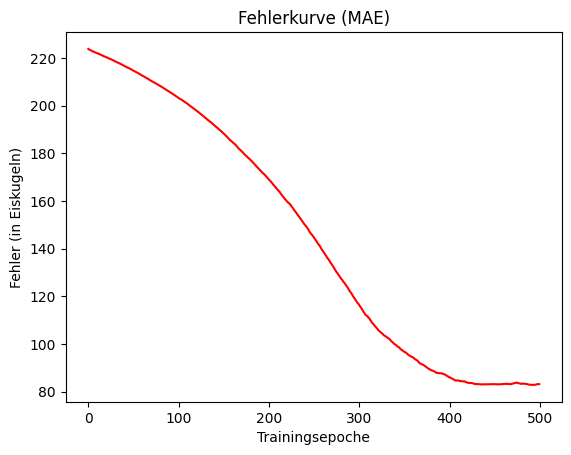

In [30]:
import matplotlib.pyplot as plt
y1 = history.history["mae"]
plt.plot(y1, color="red")
plt.xlabel("Trainingsepoche")
plt.ylabel("Fehler (in Eiskugeln)")
plt.title("Fehlerkurve (MAE)")
plt.show()

# Evaluate-Methode
Mit der Evaluate-Methode können neue für das System unbekannte Testdaten ausgewertet werden!



In [31]:
input_test = numpy.array([[ 1.6, 17, 22],
                          [ 3.3, 16, 30],
                          [ 4.8, 13, 36],
                          [ 7.7, 13, 37],
                          [ 2.4, 15, 57]])

target_test = numpy.array([354, 303, 256, 337, 382], dtype=int)

In [32]:
# Das System funktioniert auch auf den neuen Daten ähnlich gut wie auf dem Trainingsdatensatz
loss, mae = model.evaluate(input_test, target_test)
mae

1/1 [==============================] - 0s 441ms/step - loss: 20840.6426 - mae: 135.0304


135.03042602539062